In [50]:
import pandas as pd
import networkx as nx
from os import listdir
import matplotlib.pyplot as plt

def Return_Connected_Component_Stats(G):
    conn_comps = nx.weakly_connected_component_subgraphs(G)
    op = []
    for conn in conn_comps:
        nodes = conn.nodes()
        cycles = list(nx.simple_cycles(conn))
        is_DAG = nx.is_directed_acyclic_graph(conn)
        d = {'Num Nodes':len(nodes), 'IS_DAG':is_DAG,
             'Num Cycles':len(cycles),'Nodes':nodes}
        op.append(d)
    df_connected_component_Info = pd.DataFrame(data = op)
    n = len(df_connected_component_Info)
    n_singleton = len(df_connected_component_Info[df_connected_component_Info['Num Nodes']==1])
    n_nonsingleton = len(df_connected_component_Info[df_connected_component_Info['Num Nodes']>1])
    num_DAGS =  len(df_connected_component_Info[(df_connected_component_Info['IS_DAG']==True) &
                                                (df_connected_component_Info['Num Nodes'] > 1)])
    d_stat = {'Total Components':n, 'Singleton Components':n_singleton, 
             'Non Singleton Components':n_nonsingleton, 'Num DAGs':num_DAGS, 
             'Total Number of Nodes':len(G.nodes())}
    return d_stat


In [51]:
samples_path = 'Mount-2/hmp_scaffolds/stool/'
samples = listdir(samples_path)
op = []
for s in samples:
    if 'SRS' in s:
        G = nx.read_gml(samples_path+s+'/'+s+"_scaffolds/oriented.gml")
        d = Return_Connected_Component_Stats(G)
        d['Sample'] = s
        op.append(d)
conn_comp_stats = pd.DataFrame(data = op)       

In [53]:
conn_comp_stats.to_csv('Connected-Component-Analysis.csv')

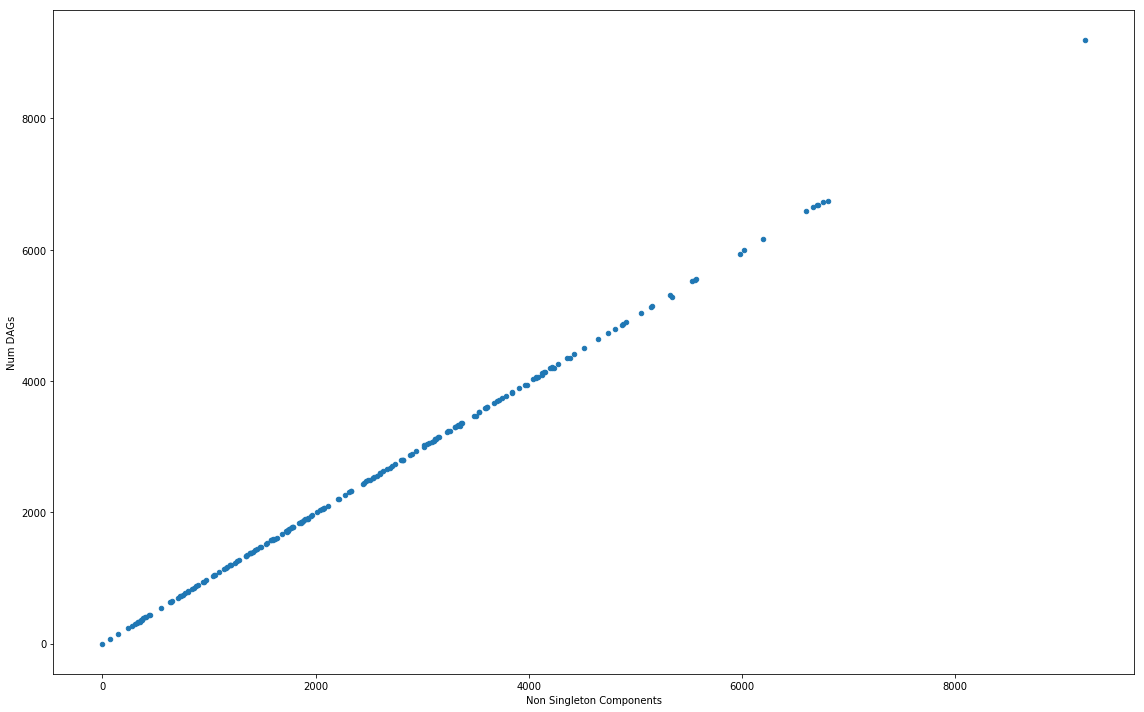

In [55]:
ax = conn_comp_stats.plot.scatter('Non Singleton Components','Num DAGs', figsize = (16,10))
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('Non-SingletonVsDAGS.png')